In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs


In [42]:
#import cleaned data set 
customerdf = pd.read_csv('Datasets/cleaned_customer.csv')
customerdf.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,...,10,4,7,0,0,0,0,0,0,1
1,1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,...,1,2,5,0,0,0,0,0,0,0
2,2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,...,2,10,4,0,0,0,0,0,0,0
3,3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,...,0,4,6,0,0,0,0,0,0,0
4,4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,...,3,6,5,0,0,0,0,0,0,0


In [43]:
customerdf.columns

Index(['Unnamed: 0', 'ID', 'Year_Birth', 'Education', 'Marital_Status',
       'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')


In merging all data sets, we now have 28 columns of data, many of which can be used as predictor variables for our study. In this portion, we will be using Marital Status, Kidhome, and Teenhome to predict the types of product bought.

The predictor variables of choice in this portion will be:

1. **Marital_Status:** Customer's marital status

2. **Kidhome:** Number of children in customer's household

3. **Teenhome:** Number of teenagers in customer's household

Our belief is that the marital status and family composition of customers may influence their purchasing behavior, particularly in relation to the types of products bought. For instance, we believe that: 
-  Married individuals may prioritize wine purchases for social or special occasions.
- Single individuals might spend less on wine compared to married counterparts.

- Families with children and teenagers allocate budget towards fruits, meat, and fish to meet family dietary needs and preferences.
- Besides that, Teenagers may influence higher spending on sweets or snacks within households.

Overall, marital status and family composition can influence spending patterns on various product categories, reflecting differences in household priorities, preferences, and lifestyle choices. Analyzing these relationships can provide valuable insights into consumer behavior and help businesses tailor their marketing strategies and product offerings to different demographic segments

## Extracting Variables
##### We will start by analyzing the variables from the dataset (Marital Status, Kidhome, and Teenhome).


In [44]:
customerdf_predictor = pd.DataFrame(customerdf[['Marital_Status', 'Kidhome', 'Teenhome']])
customerdf_predictor

,Marital_Status,Kidhome,Teenhome
0,Single,0,0
1,Single,1,1
2,Together,0,0
3,Together,1,0
4,Married,1,0
...,...,...,...
2211,Married,0,1
2212,Together,2,1
2213,Divorced,0,0
2214,Together,0,1


In [45]:
customerdf_response = pd.DataFrame(customerdf[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
customerdf_response

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2211,709,43,182,42,118,247
2212,406,0,30,0,0,8
2213,908,48,217,32,12,24
2214,428,30,214,80,30,61


In [46]:
customerdf_joint = pd.DataFrame(customerdf[['Marital_Status', 'Kidhome', 'Teenhome','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']])
customerdf_joint

,Marital_Status,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
0,Single,0,0,635,88,546,172,88,88
1,Single,1,1,11,1,6,2,1,6
2,Together,0,0,426,49,127,111,21,42
3,Together,1,0,11,4,20,10,3,5
4,Married,1,0,173,43,118,46,27,15
...,...,...,...,...,...,...,...,...,...
2211,Married,0,1,709,43,182,42,118,247
2212,Together,2,1,406,0,30,0,0,8
2213,Divorced,0,0,908,48,217,32,12,24
2214,Together,0,1,428,30,214,80,30,61


## Multi-Variate Analysis 
### Explore the distribution of the predictor and response vairables through boxplot and histogram

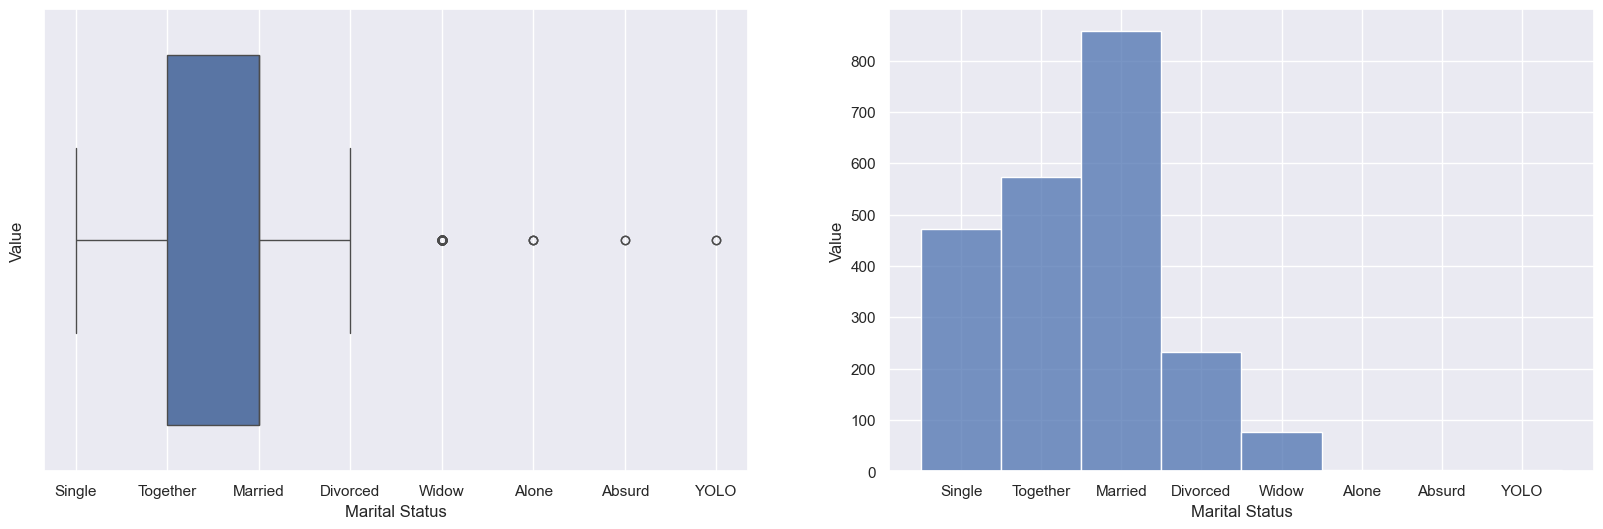

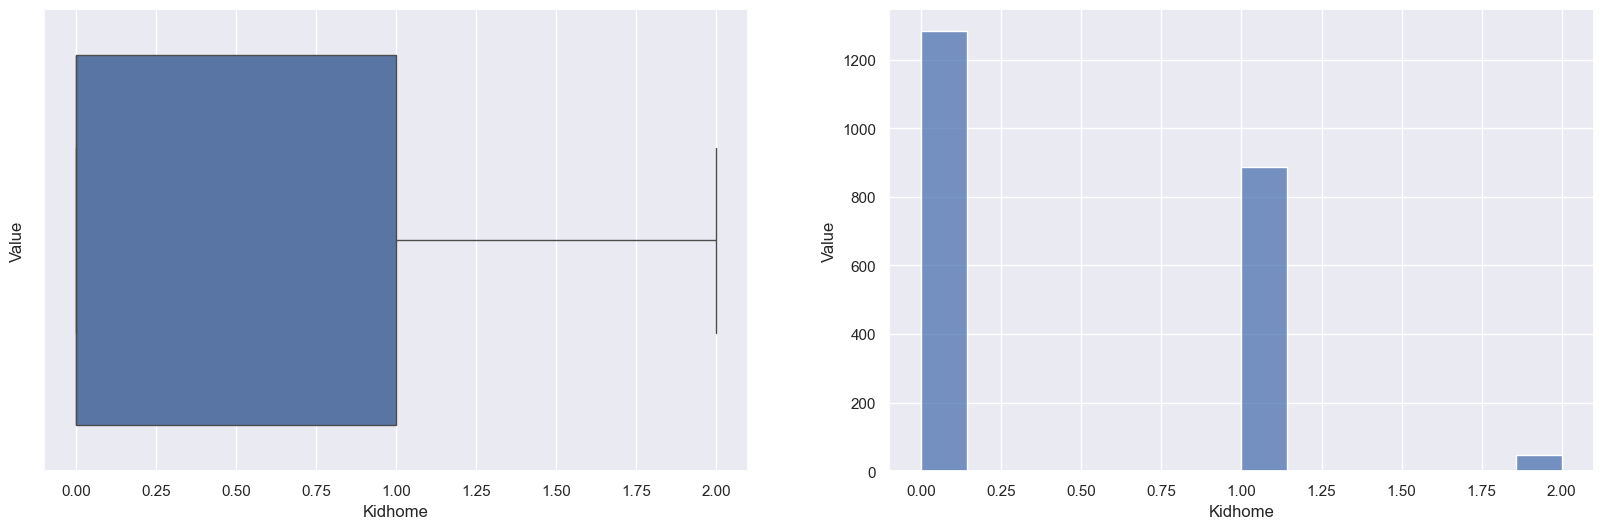

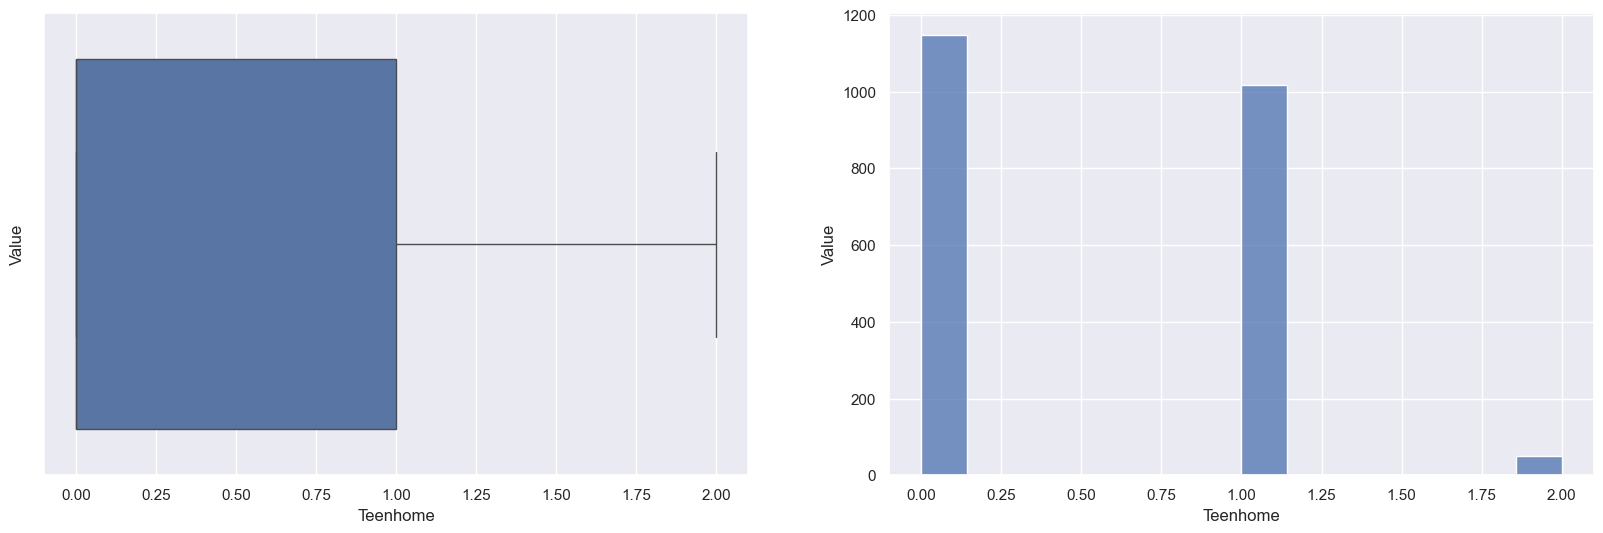

In [54]:
# Draw the distributions of all variables
# Martial Status distribution
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.boxplot(data = customerdf_predictor['Marital_Status'], orient = "h", ax = axes[0])
sb.histplot(data = customerdf_predictor['Marital_Status'], ax = axes[1])
for i in range(2):
    axes[i].set_xlabel('Marital Status')
    axes[i].set_ylabel('Value')

# Kidhome distribution
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.boxplot(data = customerdf_predictor['Kidhome'], orient = "h", ax = axes[0])
sb.histplot(data = customerdf_predictor['Kidhome'], ax = axes[1])
for i in range(2):
    axes[i].set_xlabel('Kidhome')
    axes[i].set_ylabel('Value')

# Teenhome distribution
f, axes = plt.subplots(1, 2, figsize=(20, 6))
sb.boxplot(data = customerdf_predictor['Teenhome'], orient = "h", ax = axes[0])
sb.histplot(data = customerdf_predictor['Teenhome'], ax = axes[1])
for i in range(2):
    axes[i].set_xlabel('Teenhome')
    axes[i].set_ylabel('Value')


As we can observe, the marjority individuals are married with no kids and teens. 

<Axes: >

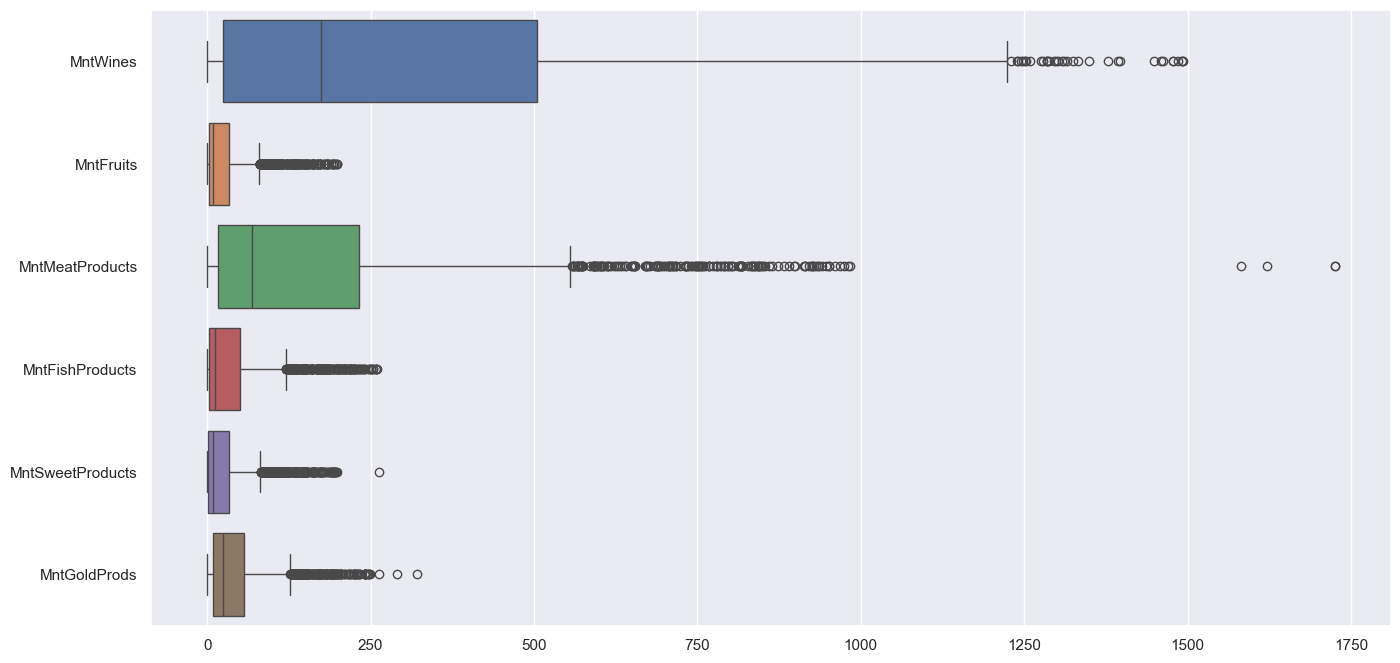

In [8]:
# Draw the Boxplots of response variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = customerdf_response, orient = "h")

The most product bought by the customer is wine, followed by meat. 

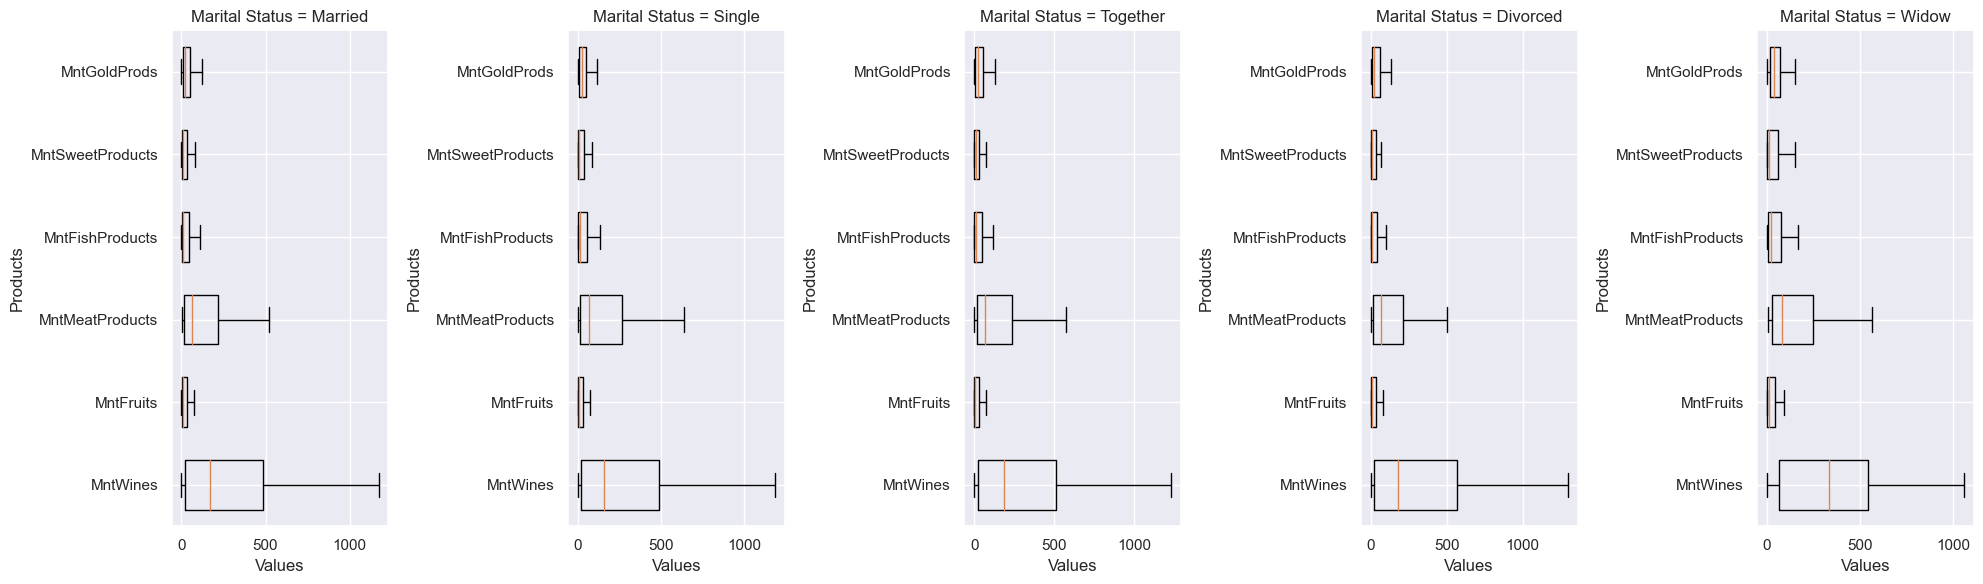

In [9]:
# Generate some example data for demonstration
np.random.seed(0)
X = customerdf_predictor['Marital_Status']  # Example predictor variable
Y = np.array(customerdf_response)  # Example response variables

# Define marital statuses
marital_statuses = ['Married', 'Single', 'Together', 'Divorced', 'Widow']

# Create boxplots for each combination of marital status and type of product
plt.figure(figsize=(20, 6))

for i, status in enumerate(marital_statuses):
    plt.subplot(1, len(marital_statuses), i + 1)
    for j, col in enumerate(customerdf_response):
        plt.boxplot(Y[X == status][:, j], positions=[j + 1], widths=0.6, labels=[col], showfliers=False, vert=False)
    plt.xlabel('Values')
    plt.ylabel('Products')
    plt.title(f'Marital Status = {status}')
    plt.grid(True)

plt.tight_layout()
plt.show()


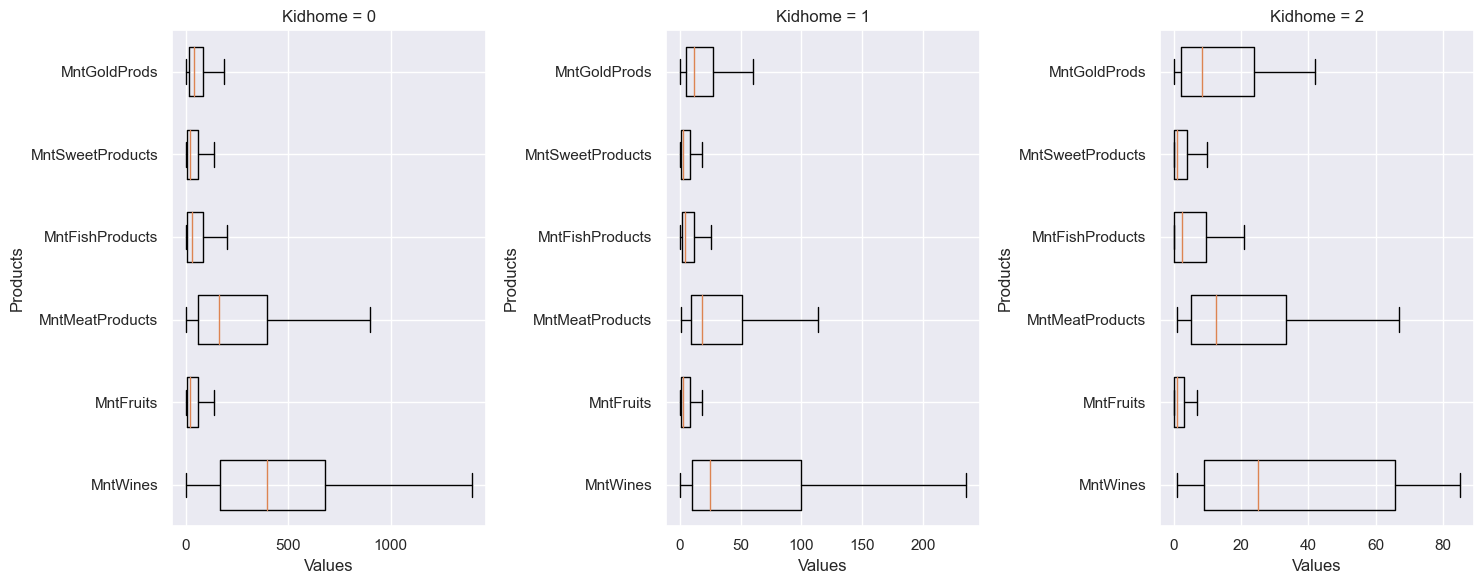

In [10]:
# Generate some example data for demonstration
np.random.seed(0)
X = customerdf_predictor['Kidhome']  # Example predictor variable
Y = np.array(customerdf_response)  # Example response variables

# Create boxplots for each combination of Kidhome value and type of product
plt.figure(figsize=(15, 6))

# Boxplot for Kidhome = 0
plt.subplot(1, 3, 1)
for i, col in enumerate(customerdf_response):
    plt.boxplot(Y[X == 0][:, i], positions=[i+1], widths=0.6, labels=[col], showfliers=False, vert=False)
plt.xlabel('Values')
plt.ylabel('Products')
plt.title('Kidhome = 0')
plt.grid(True)

# Boxplot for Kidhome = 1
plt.subplot(1, 3, 2)
for i, col in enumerate(customerdf_response):
    plt.boxplot(Y[X == 1][:, i], positions=[i+1], widths=0.6, labels=[col], showfliers=False, vert=False)
plt.xlabel('Values')
plt.ylabel('Products')
plt.title('Kidhome = 1')
plt.grid(True)

# Boxplot for Kidhome = 2
plt.subplot(1, 3, 3)
for i, col in enumerate(customerdf_response):
    plt.boxplot(Y[X == 2][:, i], positions=[i+1], widths=0.6, labels=[col], showfliers=False, vert=False)
plt.xlabel('Values')
plt.ylabel('Products')
plt.title('Kidhome = 2')
plt.grid(True)

plt.tight_layout()
plt.show()


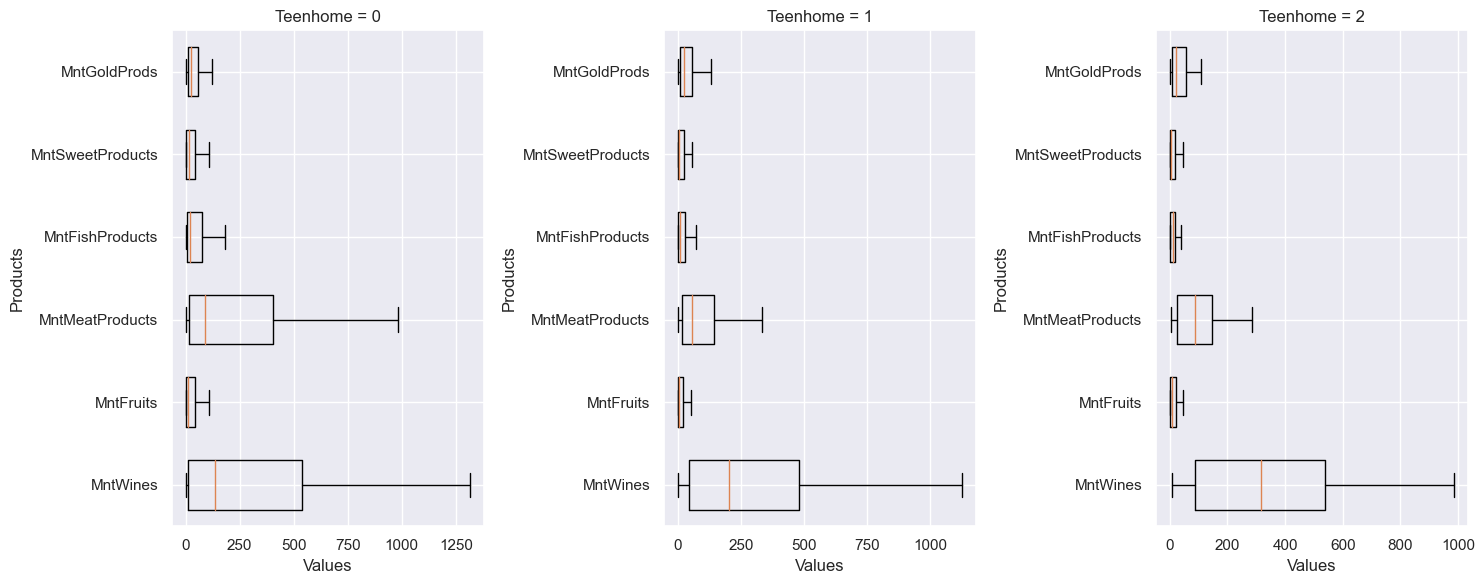

In [11]:
# Generate some example data for demonstration
np.random.seed(0)
X = customerdf_predictor['Teenhome']  # Example predictor variable
Y = np.array(customerdf_response)  # Example response variables

# Create boxplots for each combination of Teenhome value and type of product
plt.figure(figsize=(15, 6))

# Boxplot for Teenhome = 0
plt.subplot(1, 3, 1)
for i, col in enumerate(customerdf_response):
    plt.boxplot(Y[X == 0][:, i], positions=[i+1], widths=0.6, labels=[col], showfliers=False, vert=False)
plt.xlabel('Values')
plt.ylabel('Products')
plt.title('Teenhome = 0')
plt.grid(True)

# Boxplot for Teenhome = 1
plt.subplot(1, 3, 2)
for i, col in enumerate(customerdf_response):
    plt.boxplot(Y[X == 1][:, i], positions=[i+1], widths=0.6, labels=[col], showfliers=False, vert=False)
plt.xlabel('Values')
plt.ylabel('Products')
plt.title('Teenhome = 1')
plt.grid(True)

# Boxplot for Teenhome = 2
plt.subplot(1, 3, 3)
for i, col in enumerate(customerdf_response):
    plt.boxplot(Y[X == 2][:, i], positions=[i+1], widths=0.6, labels=[col], showfliers=False, vert=False)
plt.xlabel('Values')
plt.ylabel('Products')
plt.title('Teenhome = 2')
plt.grid(True)

plt.tight_layout()
plt.show()


## Jointplot
It will be more interesting to visualize them together in a jointplot as it tells us something about the correlation between the three variables

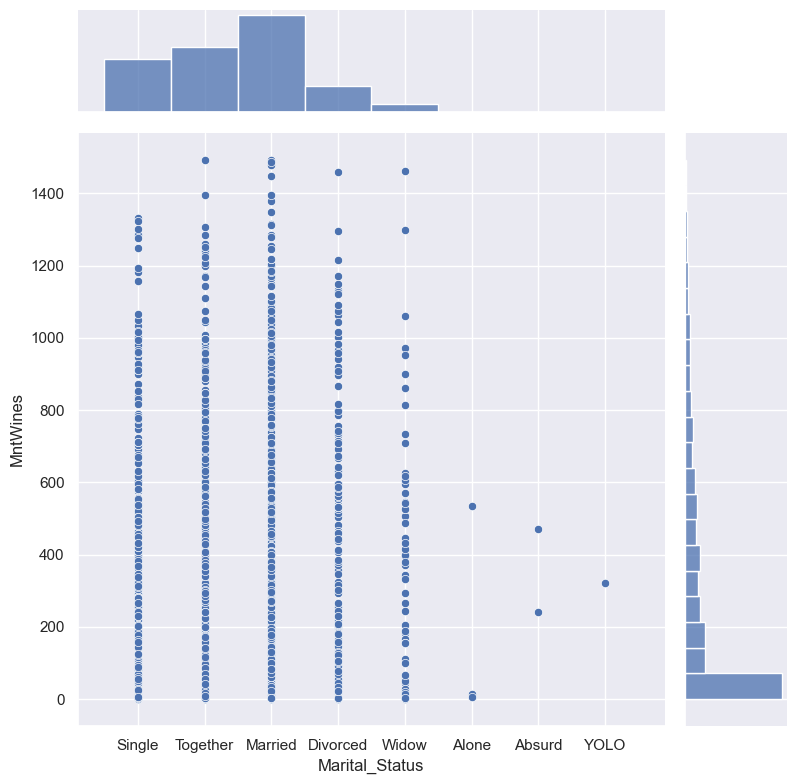

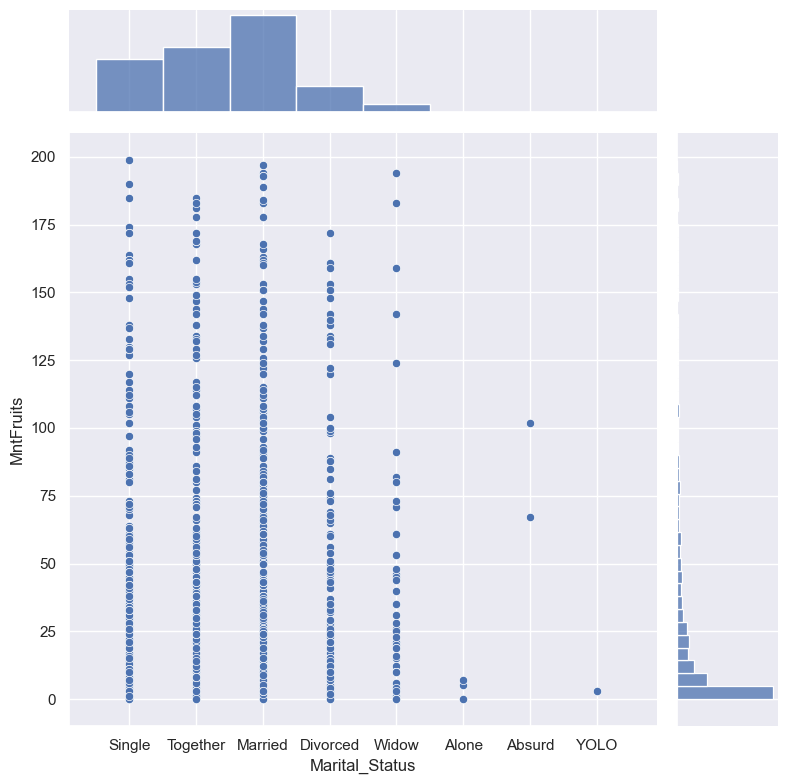

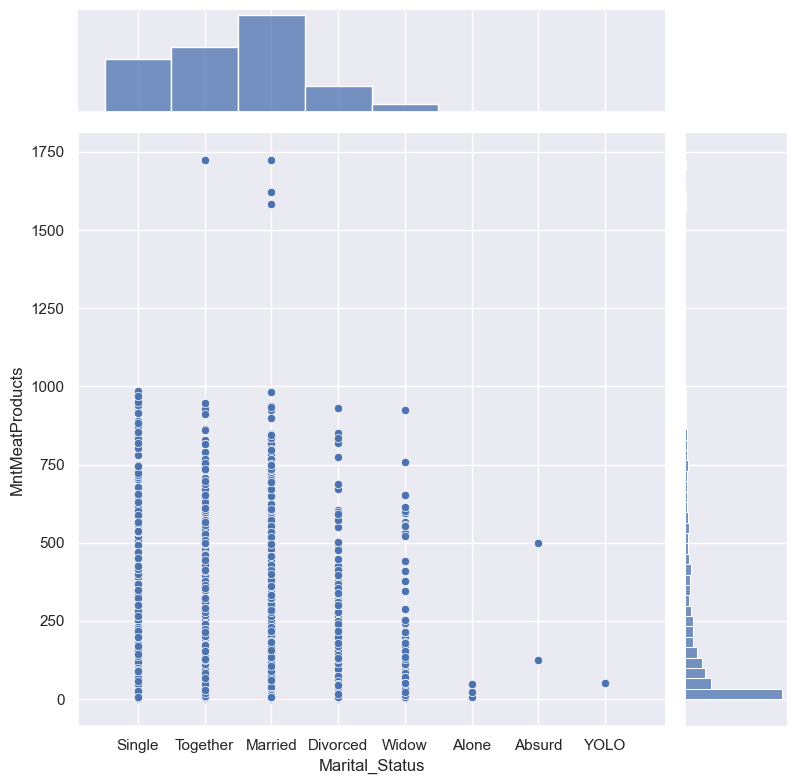

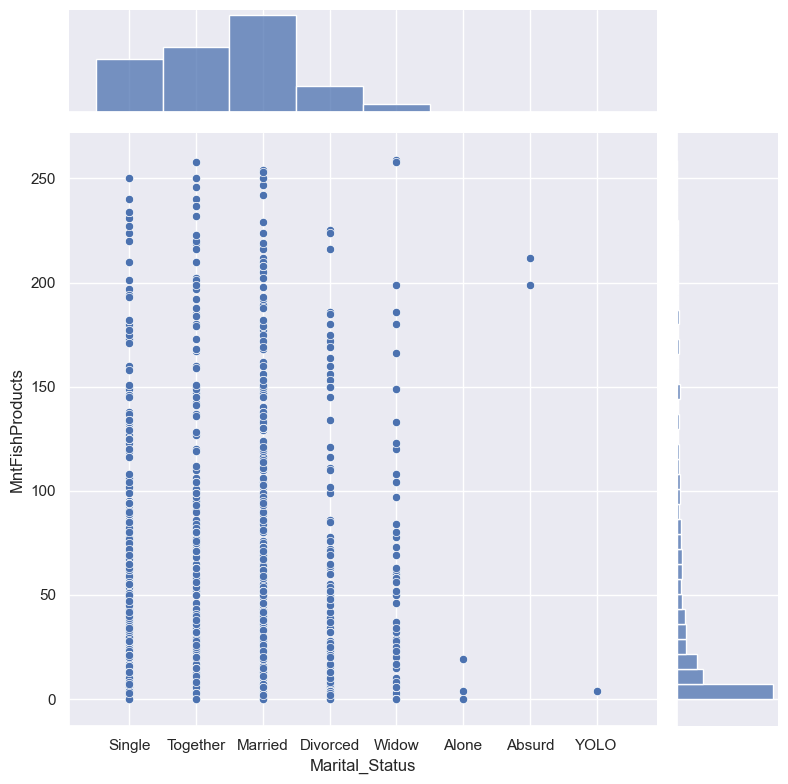

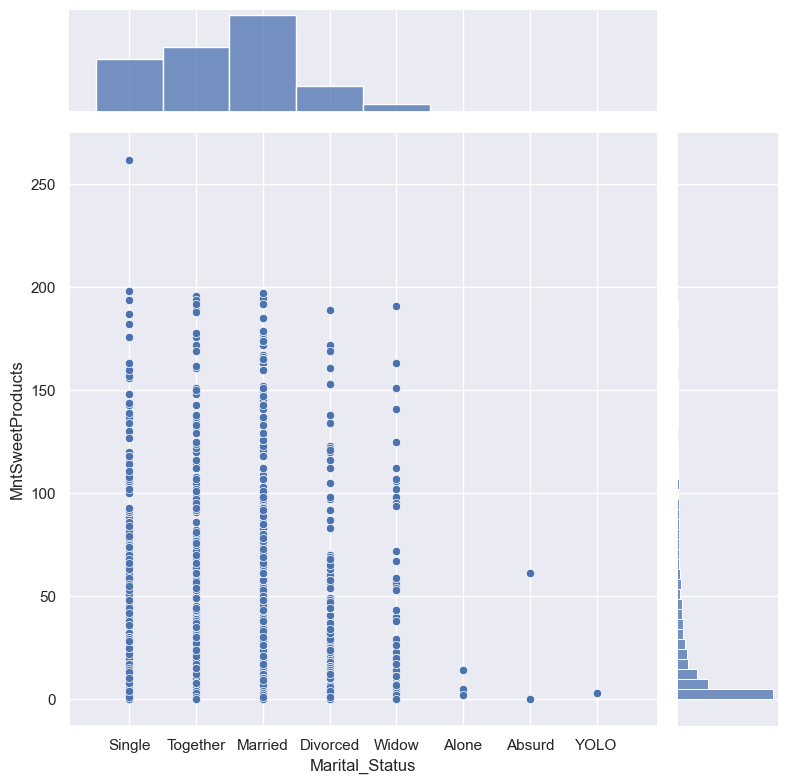

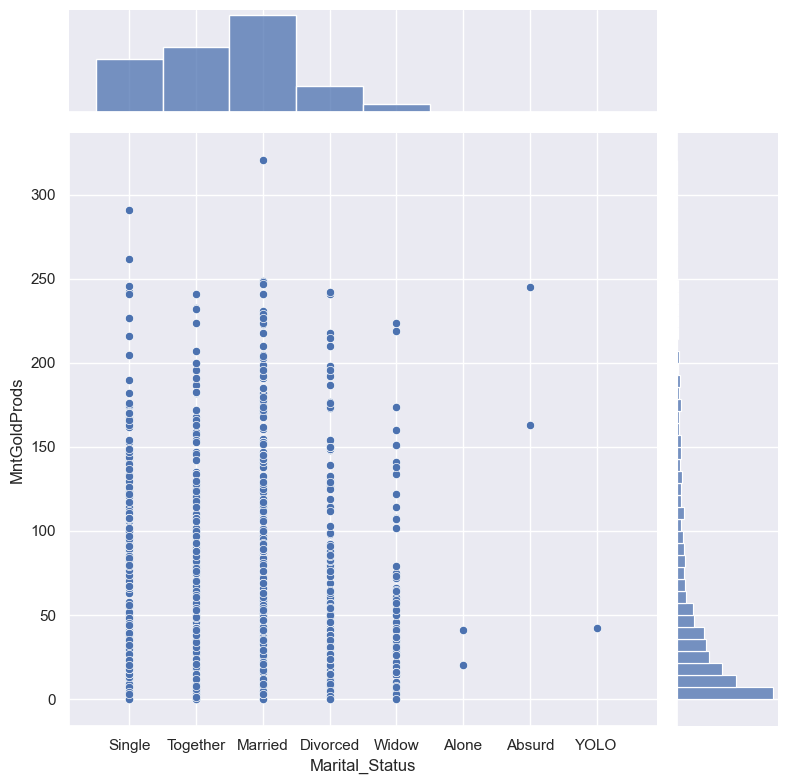

In [12]:
# Marital Status vs Response Variables
variables_to_exclude = ["Marital_Status", "Kidhome", "Teenhome"] 
for var in customerdf_joint:
    if var not in variables_to_exclude:
        sb.jointplot(data = customerdf_joint, x = "Marital_Status", y = var, height = 8)

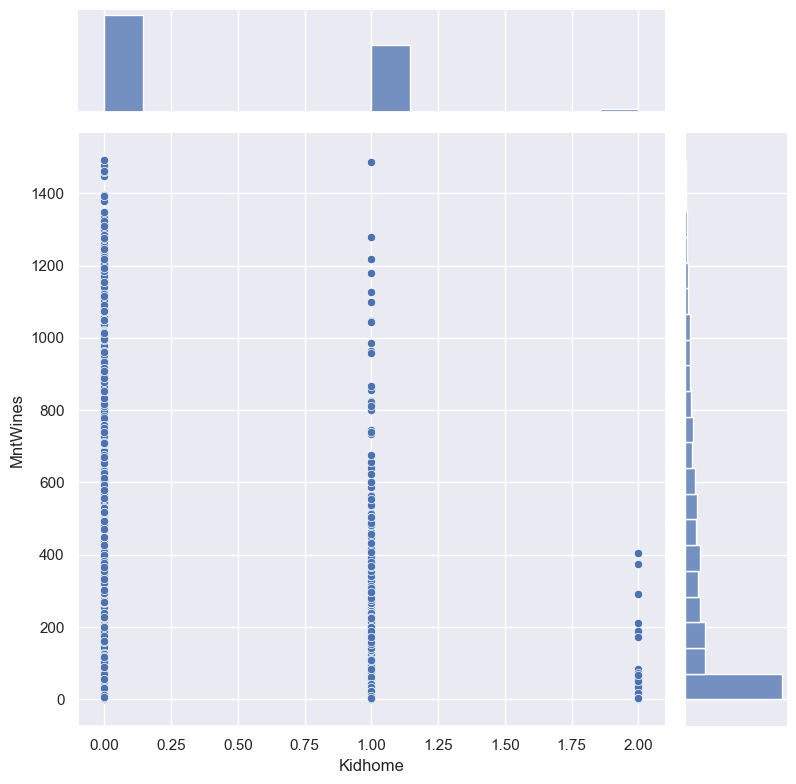

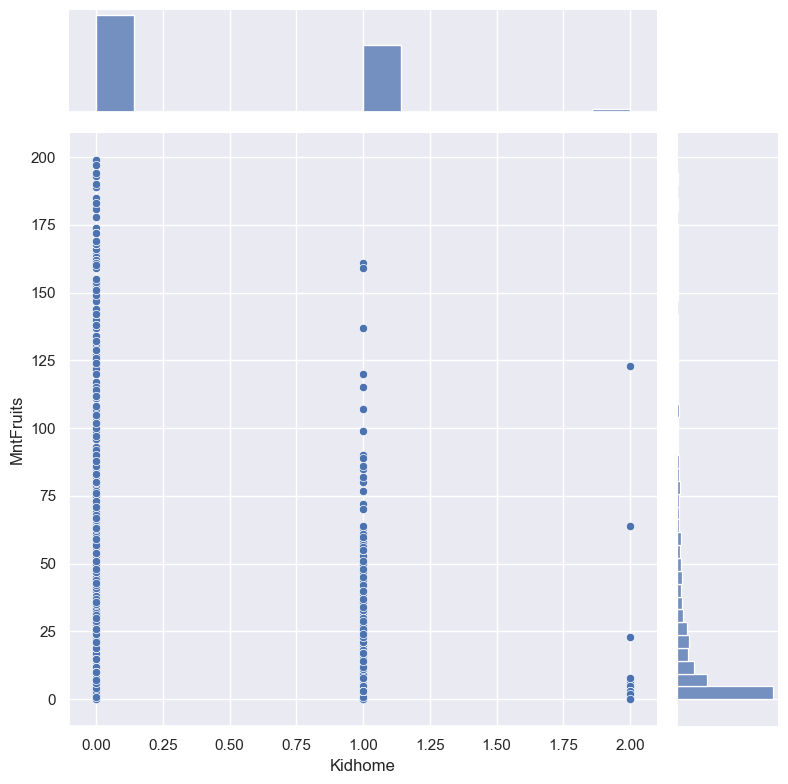

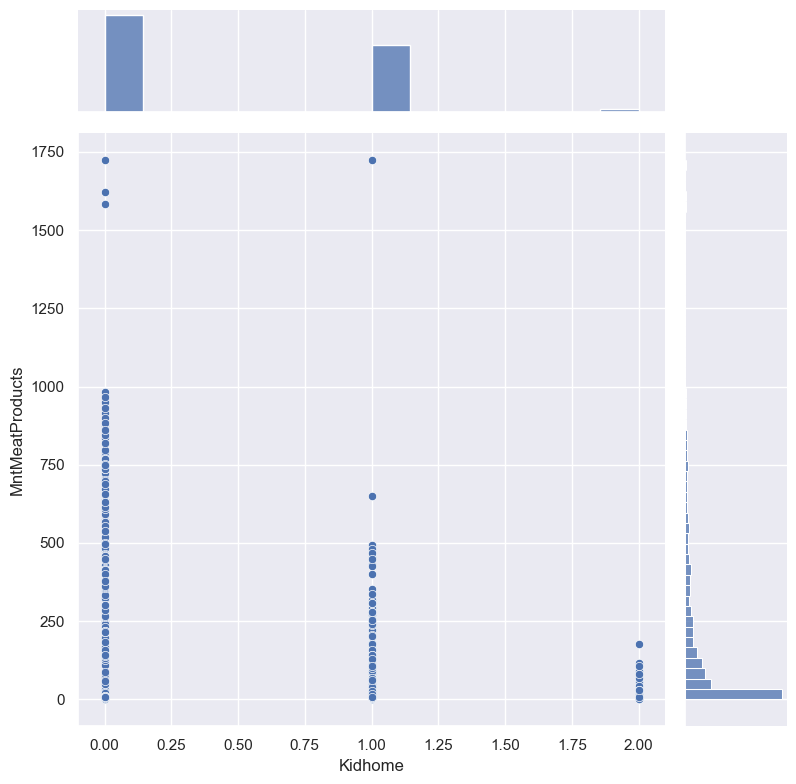

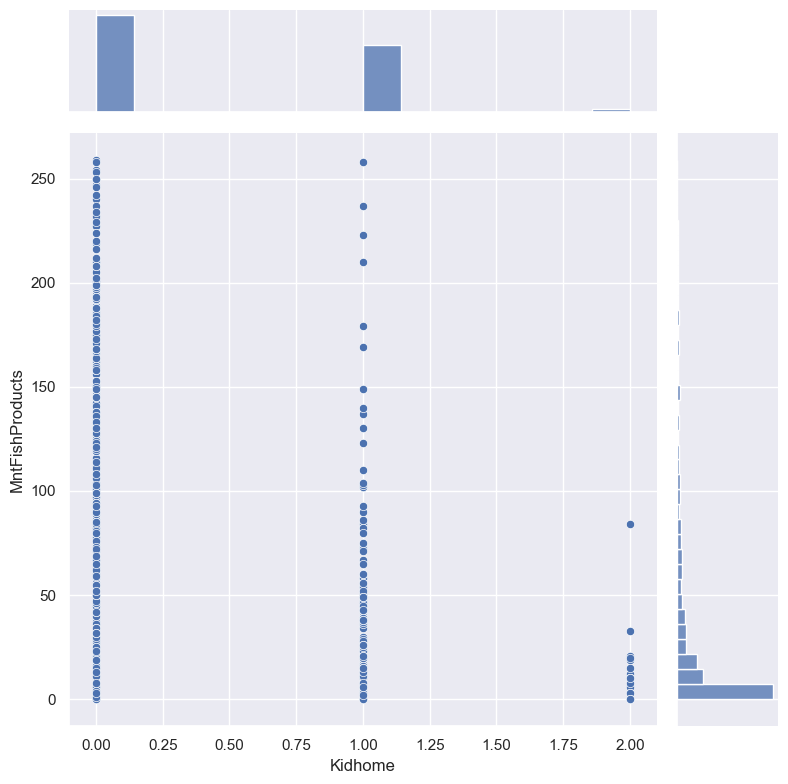

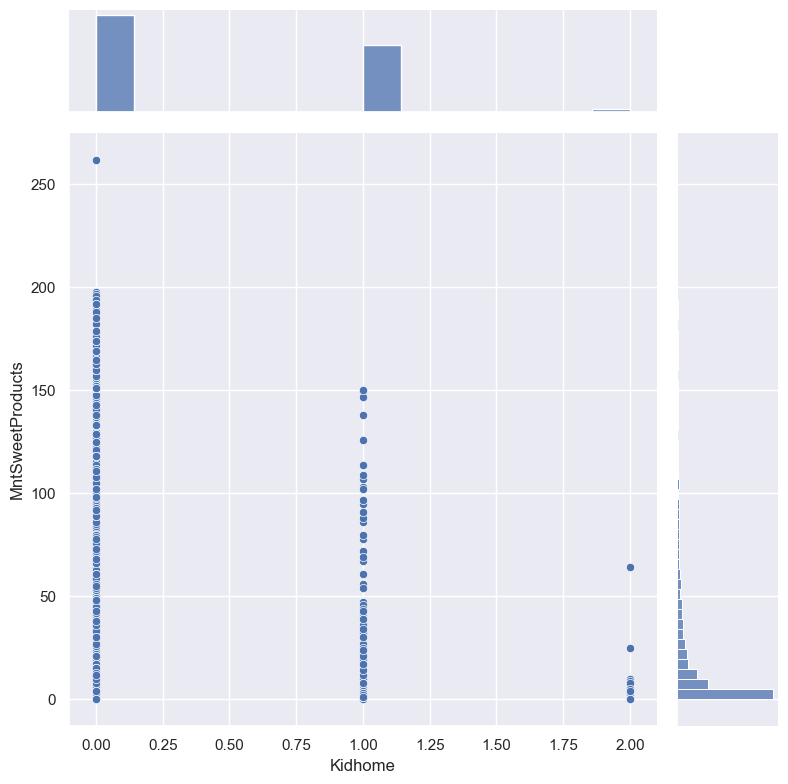

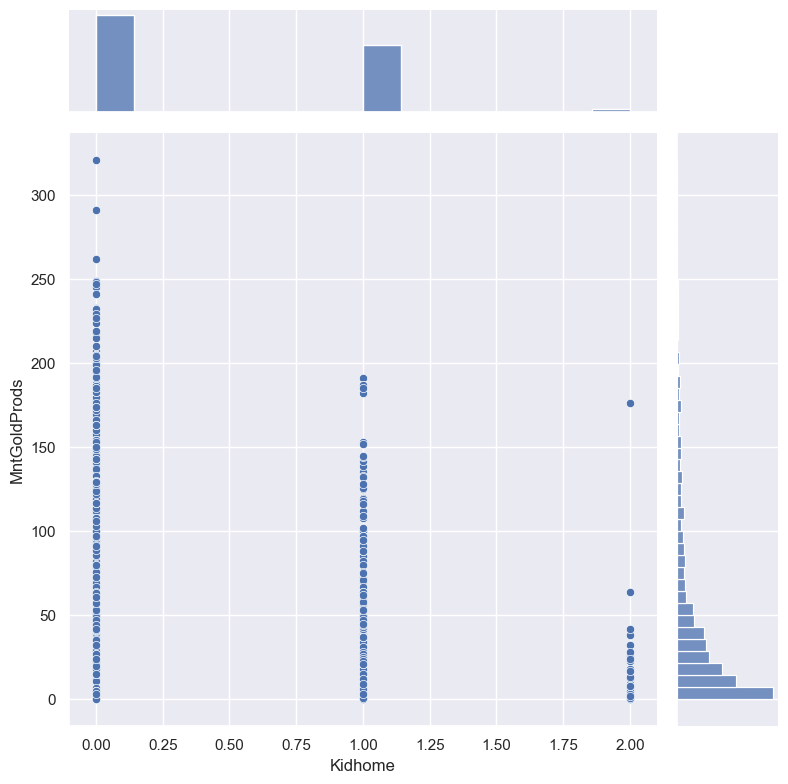

In [13]:
#Kidhome vs Response Variables
variables_to_exclude = ["Marital_Status", "Kidhome", "Teenhome"] 
for var in customerdf_joint:
    if var not in variables_to_exclude:
        sb.jointplot(data = customerdf_joint, x = "Kidhome", y = var, height = 8)

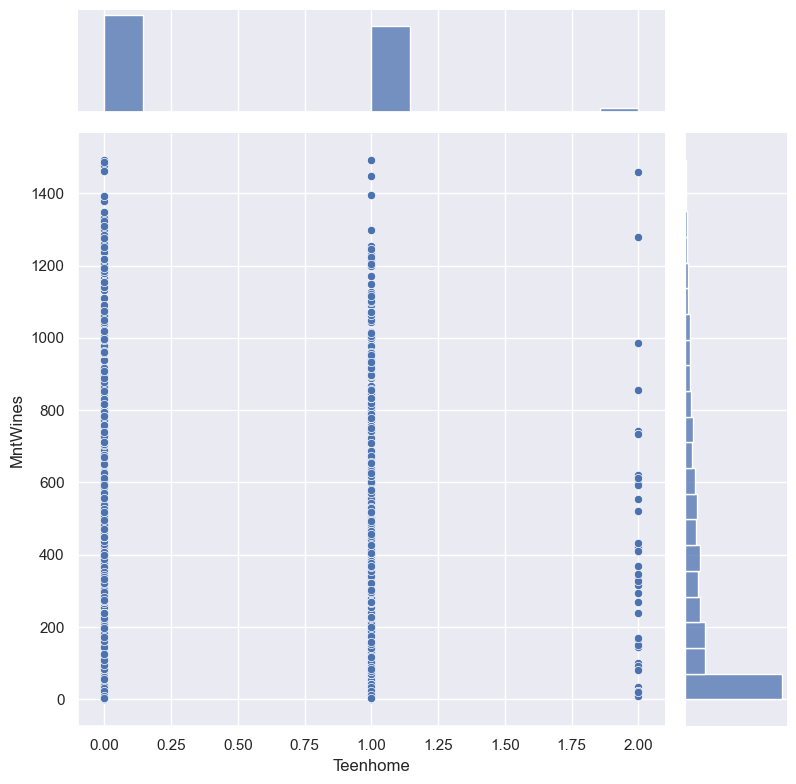

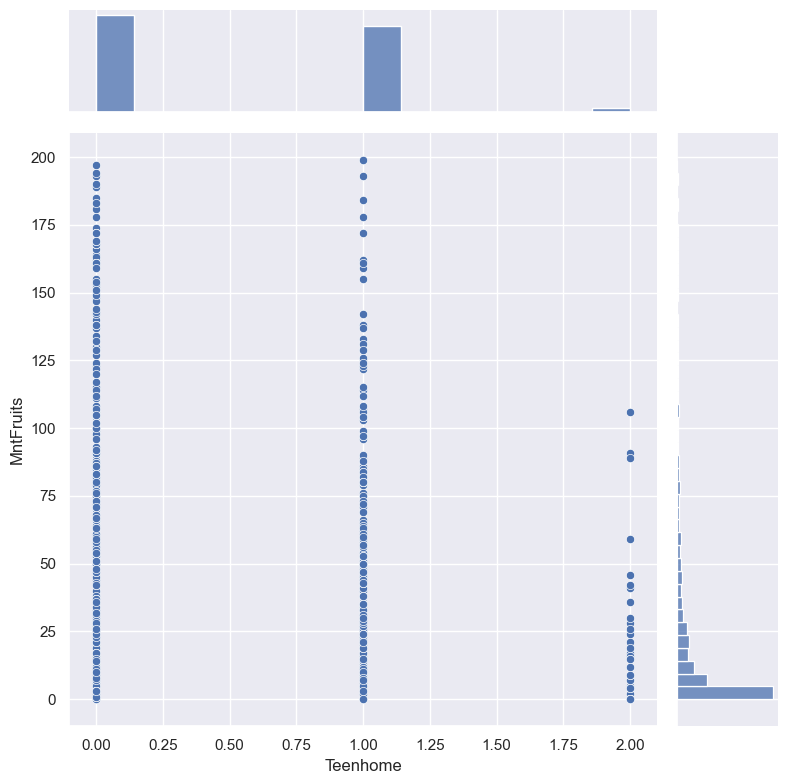

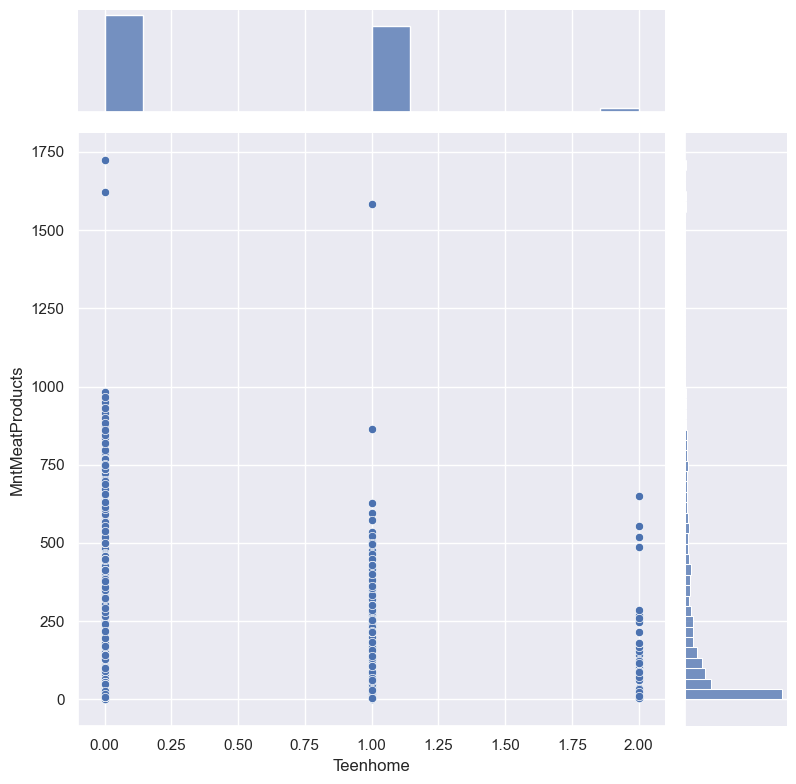

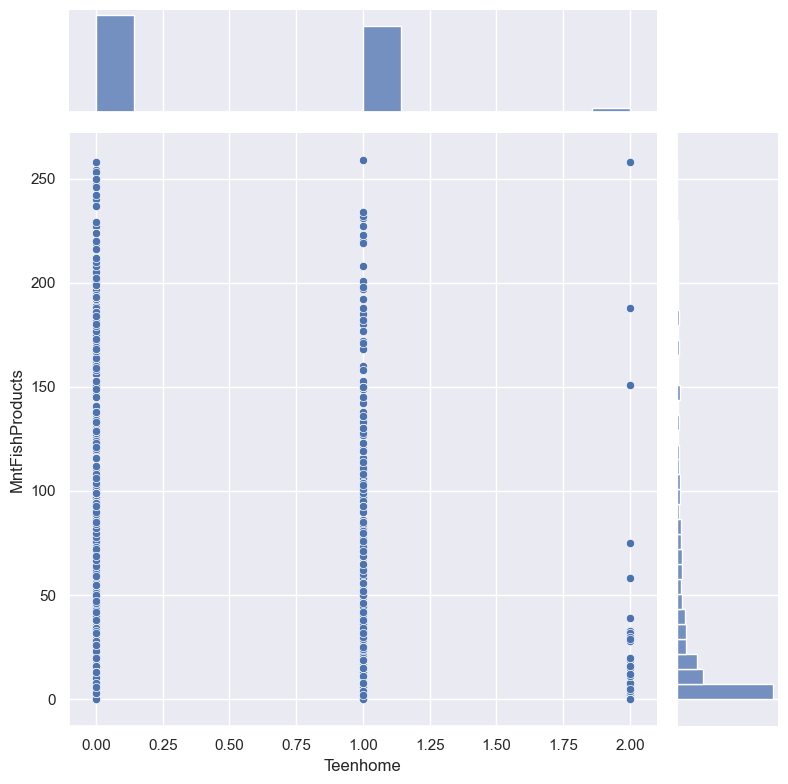

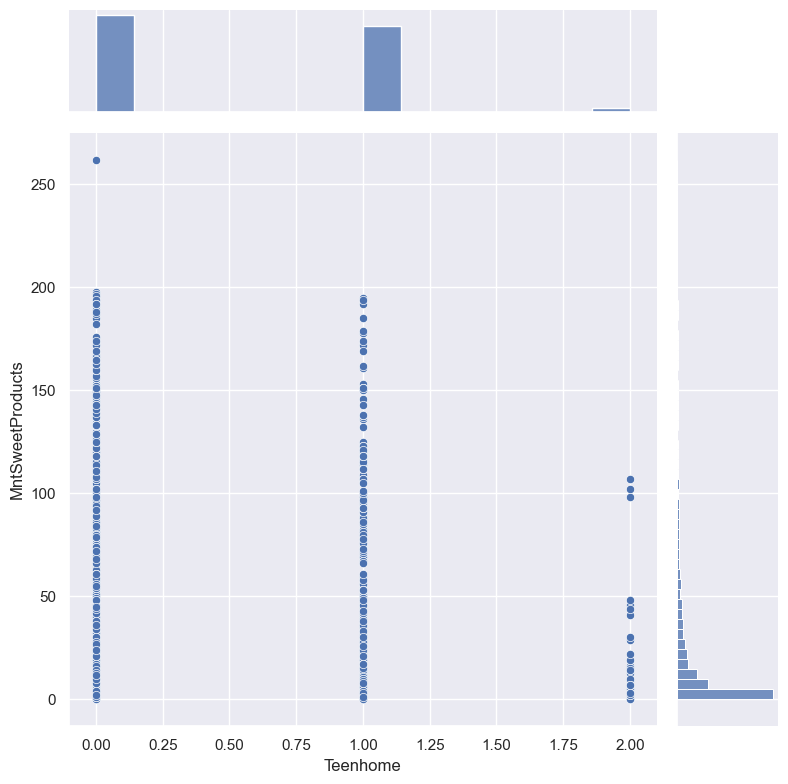

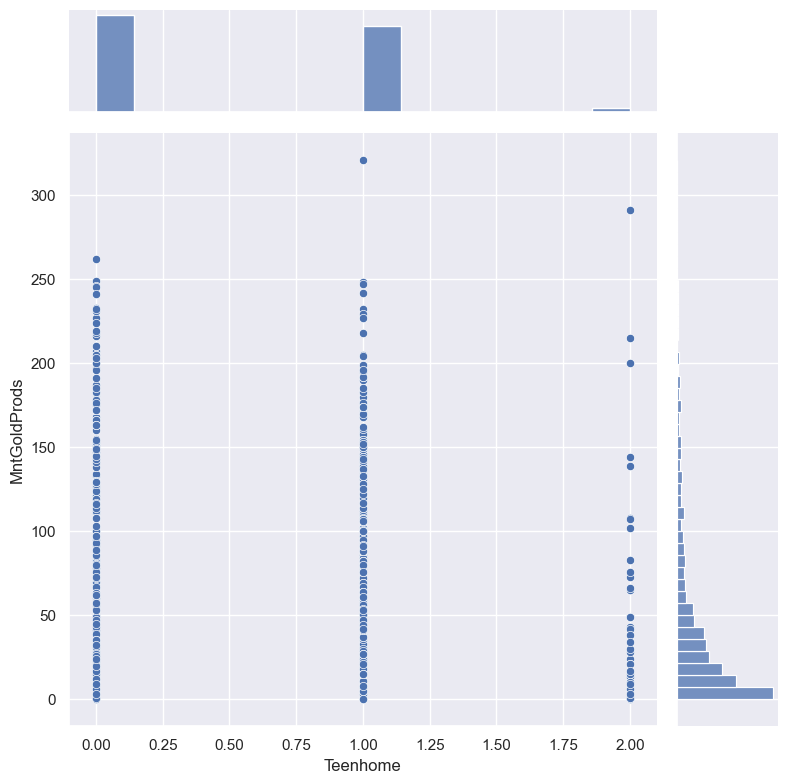

In [14]:
# Teenhome vs Response Variables
variables_to_exclude = ["Marital_Status", "Kidhome", "Teenhome"] 
for var in customerdf_joint:
    if var not in variables_to_exclude:
        sb.jointplot(data = customerdf_joint, x = "Teenhome", y = var, height = 8)

## Correlation matrix 

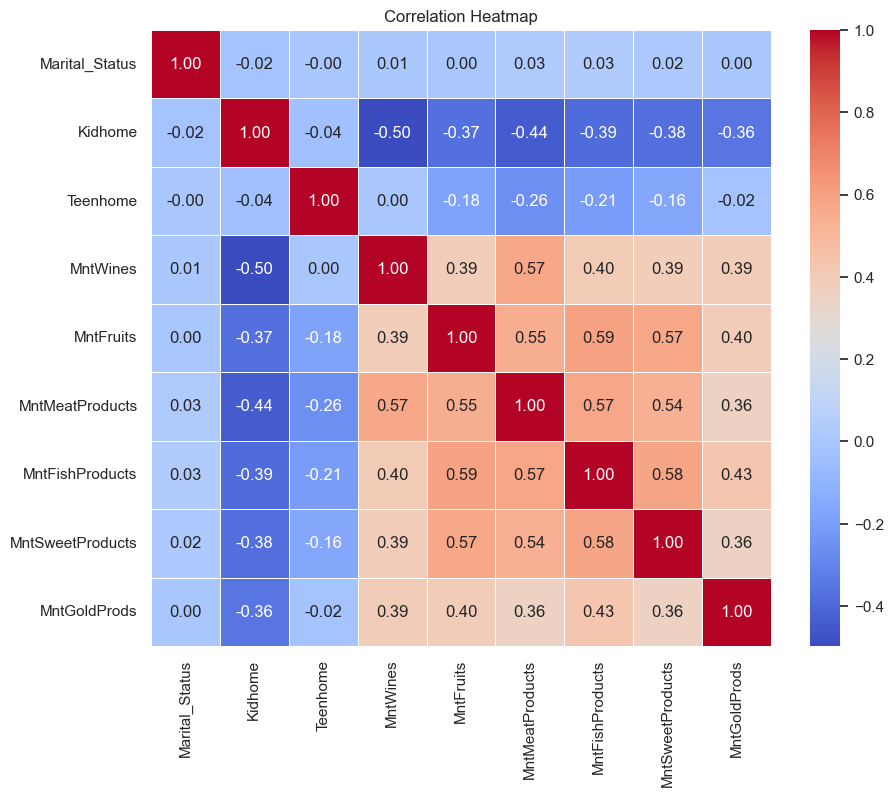

In [15]:
df = pd.DataFrame(customerdf_joint)

# Encode categorical variables
df['Marital_Status'] = df['Marital_Status'].astype('category')
df['Marital_Status'] = df['Marital_Status'].cat.codes

# Compute the correlation matrix
corr_matrix = df.corr()

# create the heatmap
plt.figure(figsize=(10, 8))
sb.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Observation 
There is a fairly good correlation between the number of kids and the amount of wines bought which has a value of -0.50. Thus, as the number of kids at home increases, the amount spent on wines tends to decrease. This shows that having kids play an important factor in purchasing wines. However, the number of teens does not seem to have a correlation. 



# Multi-variate Linear Regression: Creating a model to fit Response Variable 

Moving forward with regression analysis, we will choose the amount of wines as our response variable of choice.



Response Variable : MntWines

Predictor Feature : Marital_status, Kidhome, Teenhome

Regression Model : Total =  𝑎1
   ×
  Marital_status +  𝑎2
   ×
  Kidhome +  𝑎3
   ×
  Teenhome +  𝑏 + e
 

In [57]:
customerdf_popmodel = pd.DataFrame(customerdf_joint[['Marital_Status', 'Kidhome', 'Teenhome', 'MntWines']])

# Encode Marital Status to Numerical Values
label_encoder = LabelEncoder()
customerdf_popmodel['MaritalStatusEncoded'] = label_encoder.fit_transform(customerdf_popmodel['Marital_Status'])

# Drop the original categorical Marital Status column
customerdf_popmodel.drop('Marital_Status', axis=1, inplace=True)

# Display the DataFrame
customerdf_popmodel

,Kidhome,Teenhome,MntWines,MaritalStatusEncoded
0,0,0,635,4
1,1,1,11,4
2,0,0,426,5
3,1,0,11,5
4,1,0,173,3
...,...,...,...,...
2211,0,1,709,3
2212,2,1,406,5
2213,0,0,908,2
2214,0,1,428,5


In [56]:
# Extract Response and Predictors
y = pd.DataFrame(customerdf_response["MntWines"]) # Response
X = pd.DataFrame(customerdf_popmodel) # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns=["Predictors", "Coefficients"]))
print()


Intercept of Regression 	: b =  [-2.27373675e-13]
Coefficients of Regression 	: a =  [[-1.21342302e-13  1.99840144e-15  1.00000000e+00  1.36440729e-15
   1.43349824e-16 -5.68774252e-16 -6.29006070e-16 -8.69174593e-16
   8.44396430e-15]]

             Predictors  Coefficients
0               Kidhome -1.213423e-13
1              Teenhome  1.998401e-15
2              MntWines  1.000000e+00
3             MntFruits  1.364407e-15
4       MntMeatProducts  1.433498e-16
5       MntFishProducts -5.687743e-16
6      MntSweetProducts -6.290061e-16
7          MntGoldProds -8.691746e-16
8  MaritalStatusEncoded  8.443964e-15



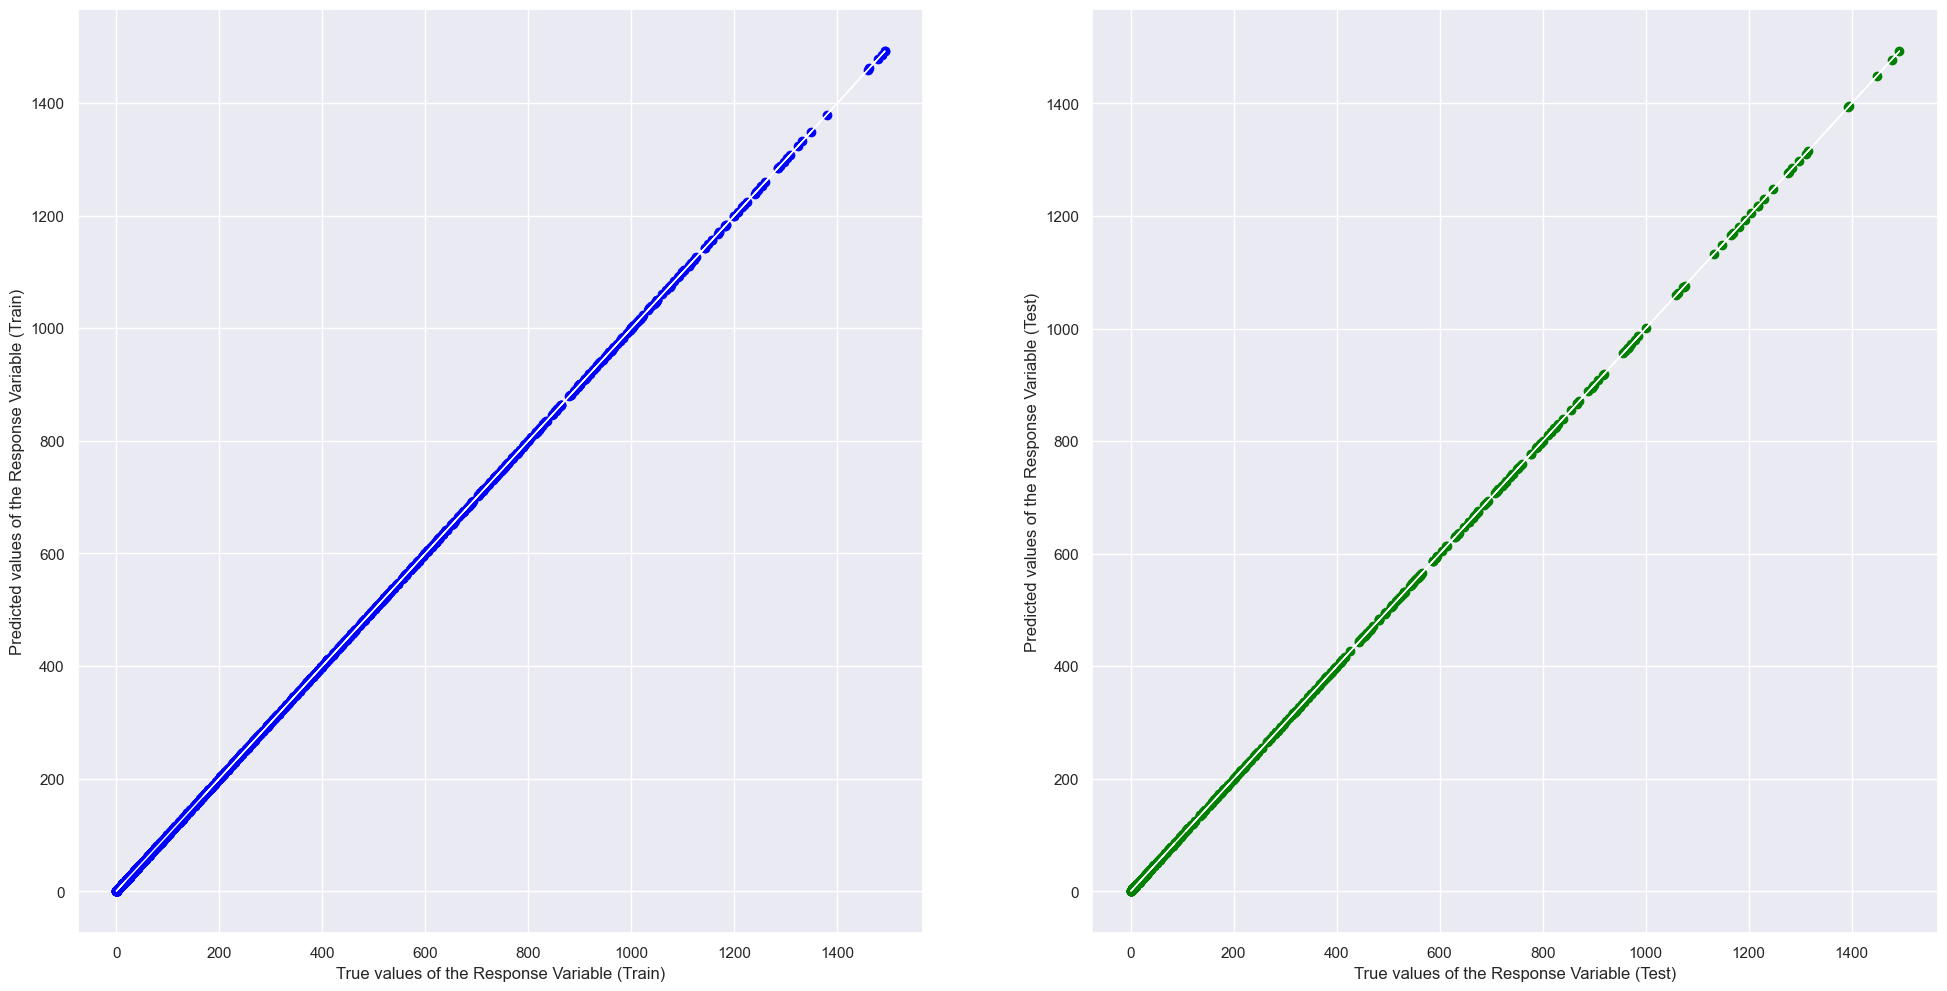

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 2.3242082765919567e-25

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 2.482851151163453e-25



In [298]:
# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color="blue")
axes[0].plot(y_train, y_train, 'w-', linewidth=1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color="green")
axes[1].plot(y_test, y_test, 'w-', linewidth=1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

In [300]:
# for splitting data set to train and test
def split_data(x, y):
    num_data = y.shape[0]
    num_train = int(num_data * 0.8)
    num_test = num_data - num_train

    # Train Set
    x_train = pd.DataFrame(x[:num_train])
    y_train = pd.DataFrame(y[:num_train])

    # Test Set
    x_test = pd.DataFrame(x[-num_test:])
    y_test = pd.DataFrame(y[-num_test:])
    
    return [x_train, y_train], [x_test, y_test]

# for training linear regression model
def train_linear_reg(x, y):
    linreg = LinearRegression()
    linreg.fit(x, y)
    
    return linreg

# for computing the R2, MSE and RMSE of predictions on test set
def check_model_goodness(train_set, test_set):
    def mean_sq_err(actual, predicted):
        '''Returns the Mean Squared Error of actual and predicted values'''
        return np.mean(np.square(np.array(actual) - np.array(predicted)))
    
    # first perform model training based on train set
    linreg = train_linear_reg(train_set[0], train_set[1])    
    # prediction is done on test set
    test_pred = linreg.predict(test_set[0])
    
    # compute R2
    r_2 = linreg.score(test_set[0], test_set[1])
    
    # compute MSE
    mse = mean_sq_err(test_set[1], test_pred)

    # compute RMSE
    rmse = np.sqrt(mse)
    
    return r_2, mse, rmse
    

## Marital Status evaluation 

In [301]:
train_set, test_set = split_data(customerdf_popmodel['MaritalStatusEncoded'], customerdf_popmodel['MntWines'])
r_2, mse, rmse = check_model_goodness(train_set, test_set)
print("Printing evaluation result for <MaritalStatus>")
print("Explained Variance (R^2) \t:", r_2)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", rmse)

Printing evaluation result for <MaritalStatus>
Explained Variance (R^2) 	: 0.00017966889712683898
Mean Squared Error (MSE) 	: 112636.12907147717
Root Mean Squared Error (RMSE) 	: 335.61306451250846


## Kidhome evaluation 

In [302]:
train_set, test_set = split_data(customerdf_popmodel['Kidhome'], customerdf_popmodel['MntWines'])
r_2, mse, rmse = check_model_goodness(train_set, test_set)
r_2, mse, rmse = check_model_goodness(train_set, test_set)
print("Printing evaluation result for <Kidhome>")
print("Explained Variance (R^2) \t:", r_2)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", rmse)

Printing evaluation result for <Kidhome>
Explained Variance (R^2) 	: 0.24954342408203534
Mean Squared Error (MSE) 	: 84543.71362342041
Root Mean Squared Error (RMSE) 	: 290.76401707126763


## Teenhome evaluation

In [303]:
train_set, test_set = split_data(customerdf_popmodel['Teenhome'], customerdf_popmodel['MntWines'])
r_2, mse, rmse = check_model_goodness(train_set, test_set)
r_2, mse, rmse = check_model_goodness(train_set, test_set)
print("Printing evaluation result for <Teenhome>")
print("Explained Variance (R^2) \t:", r_2)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", rmse)

Printing evaluation result for <Teenhome>
Explained Variance (R^2) 	: -0.0011569323776383644
Mean Squared Error (MSE) 	: 112786.70571911895
Root Mean Squared Error (RMSE) 	: 335.83732031910773


# to be continued .... 

# Multi-variate K-means clustering

In [62]:
# convert the categorical variables to numerical values
customerdf_numeric = pd.DataFrame(customerdf_joint)

# Encode Marital Status to Numerical Values
label_encoder = LabelEncoder()
customerdf_numeric['MaritalStatusEncoded'] = label_encoder.fit_transform(customerdf_numeric['Marital_Status'])

# Drop the original categorical Marital Status column
customerdf_numeric.drop('Marital_Status', axis=1, inplace=True)

# Display
customerdf_numeric

,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,MaritalStatusEncoded
0,0,0,635,88,546,172,88,88,4
1,1,1,11,1,6,2,1,6,4
2,0,0,426,49,127,111,21,42,5
3,1,0,11,4,20,10,3,5,5
4,1,0,173,43,118,46,27,15,3
...,...,...,...,...,...,...,...,...,...
2211,0,1,709,43,182,42,118,247,3
2212,2,1,406,0,30,0,0,8,5
2213,0,0,908,48,217,32,12,24,2
2214,0,1,428,30,214,80,30,61,5


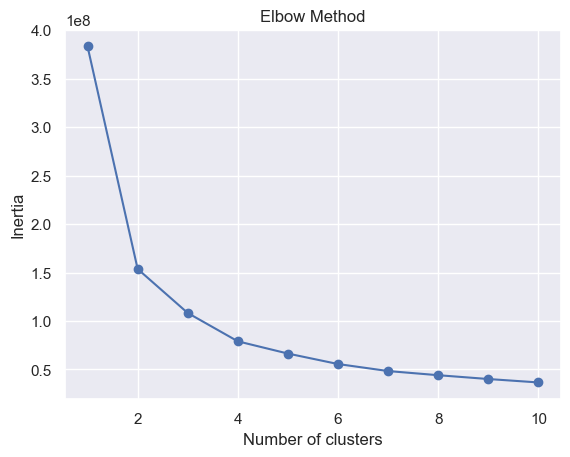

In [63]:
# Elbow method to determine the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', random_state=42)
    kmeans.fit(customerdf_numeric)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


optimal number of clusters (k) = 3 using the elbow method 

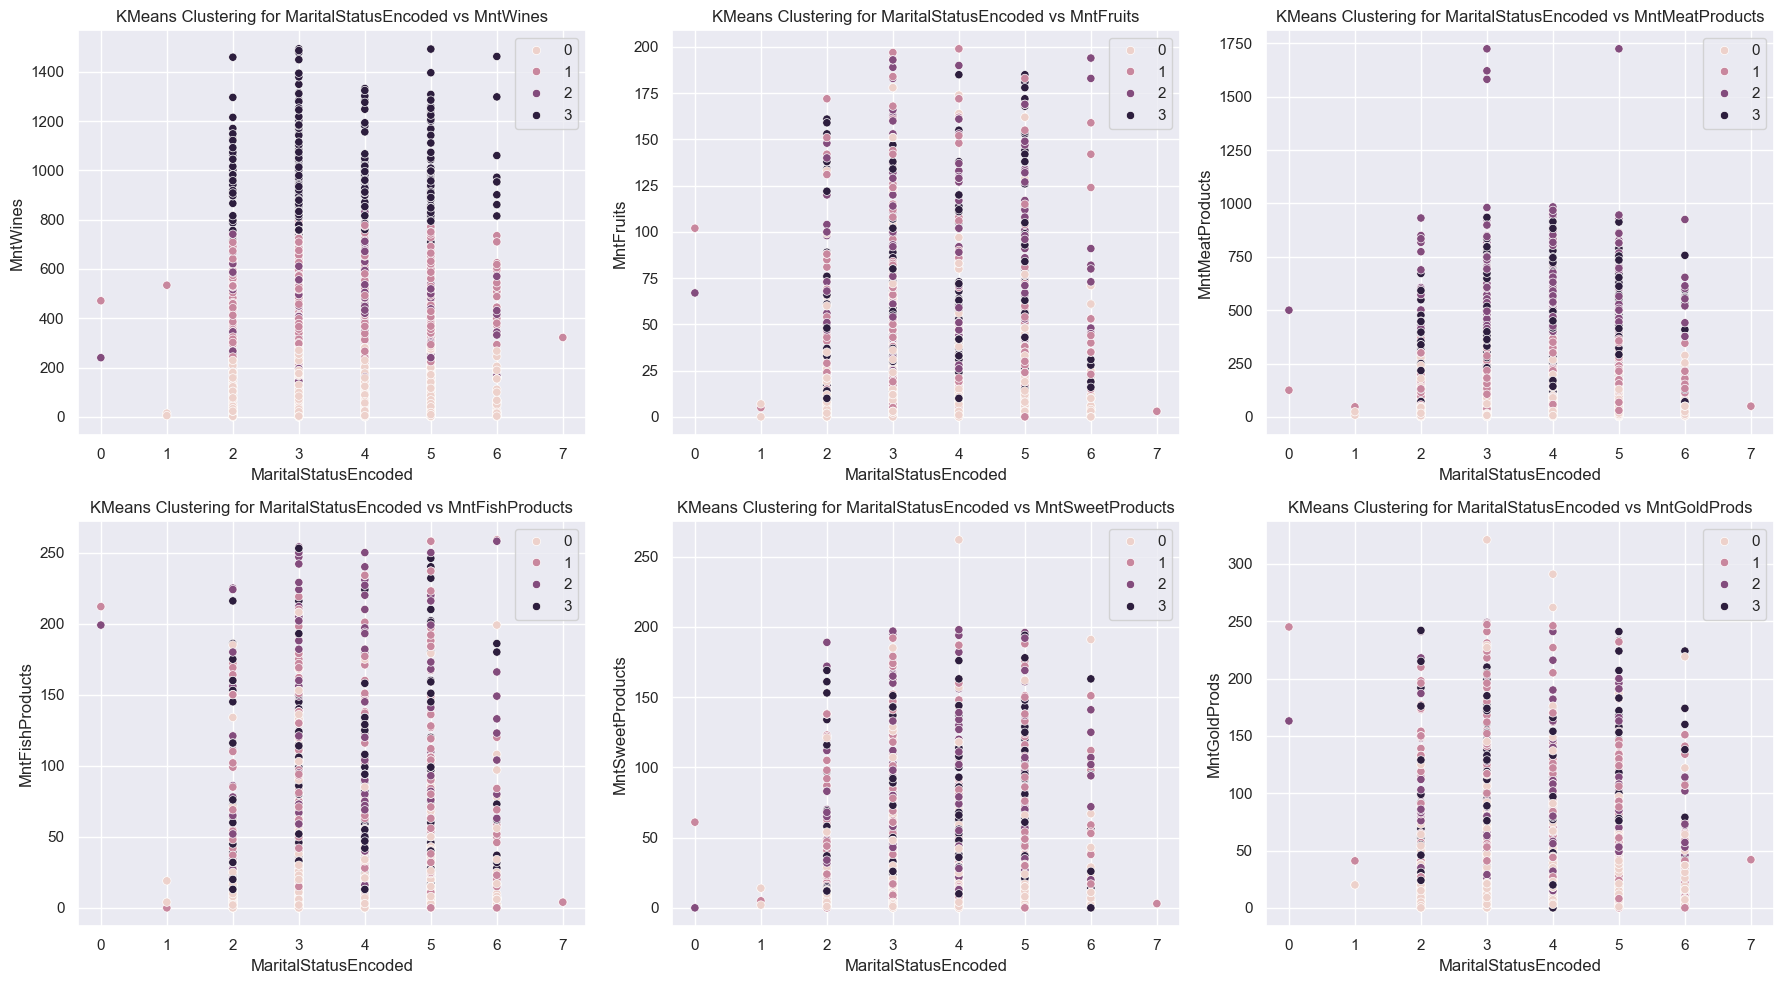

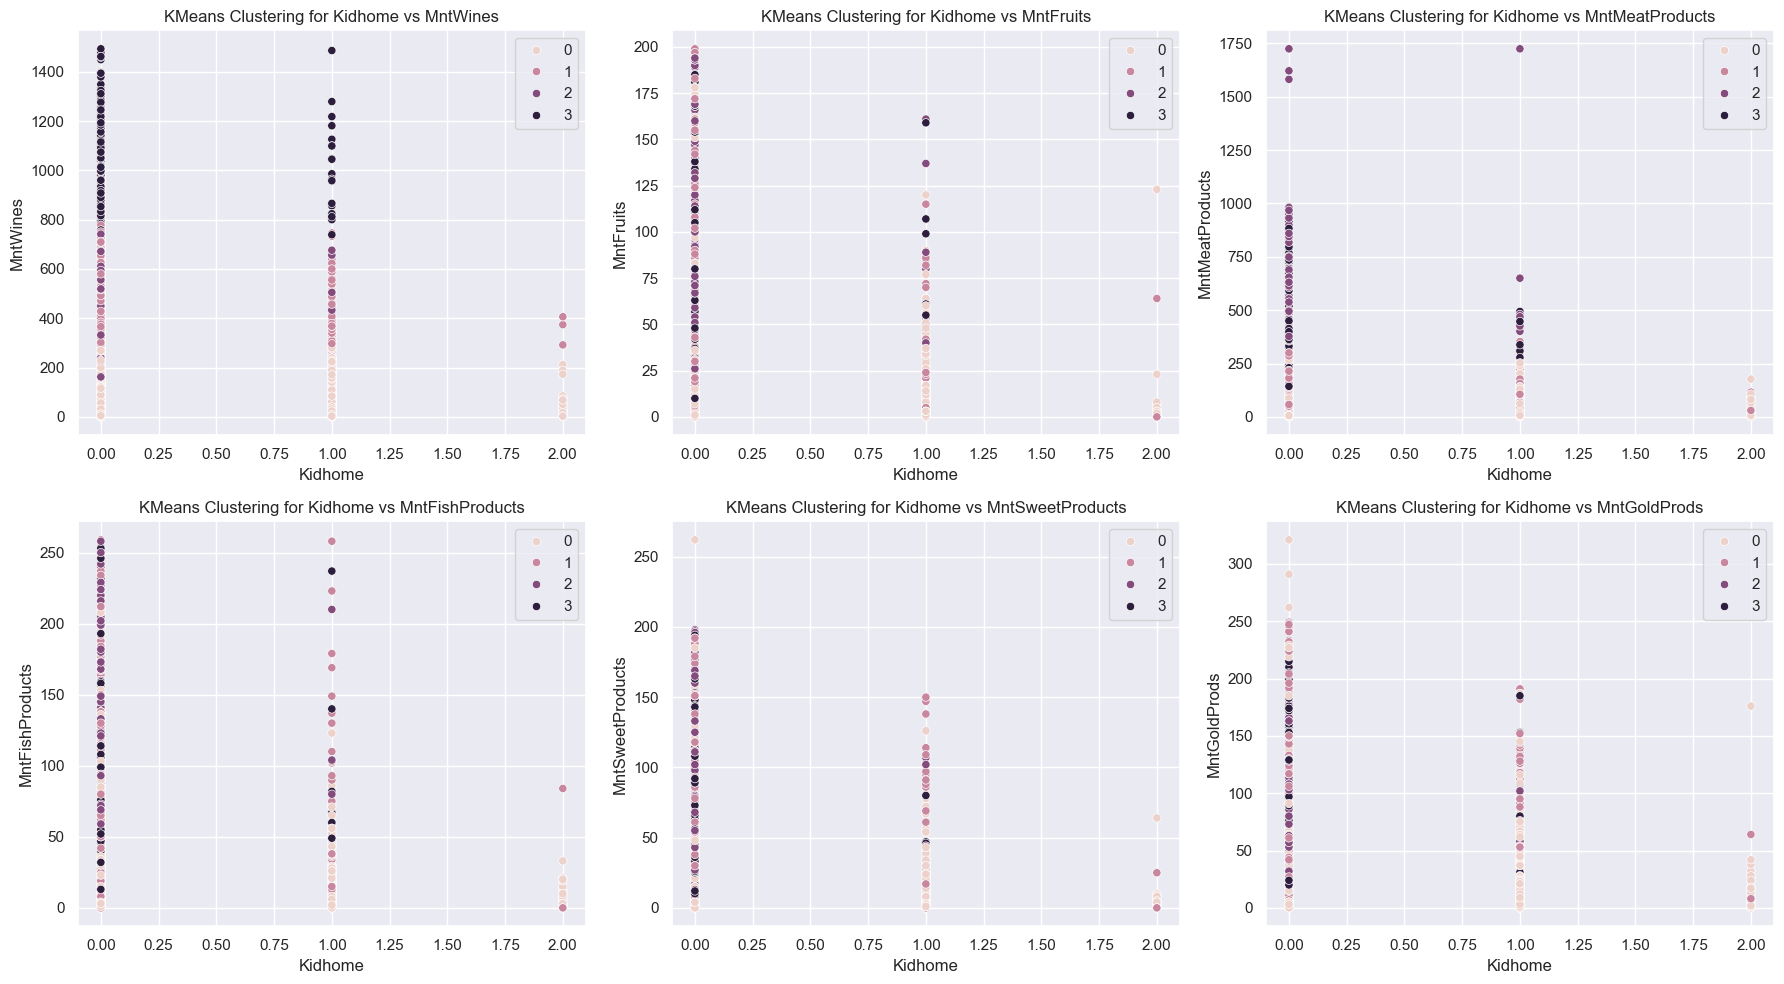

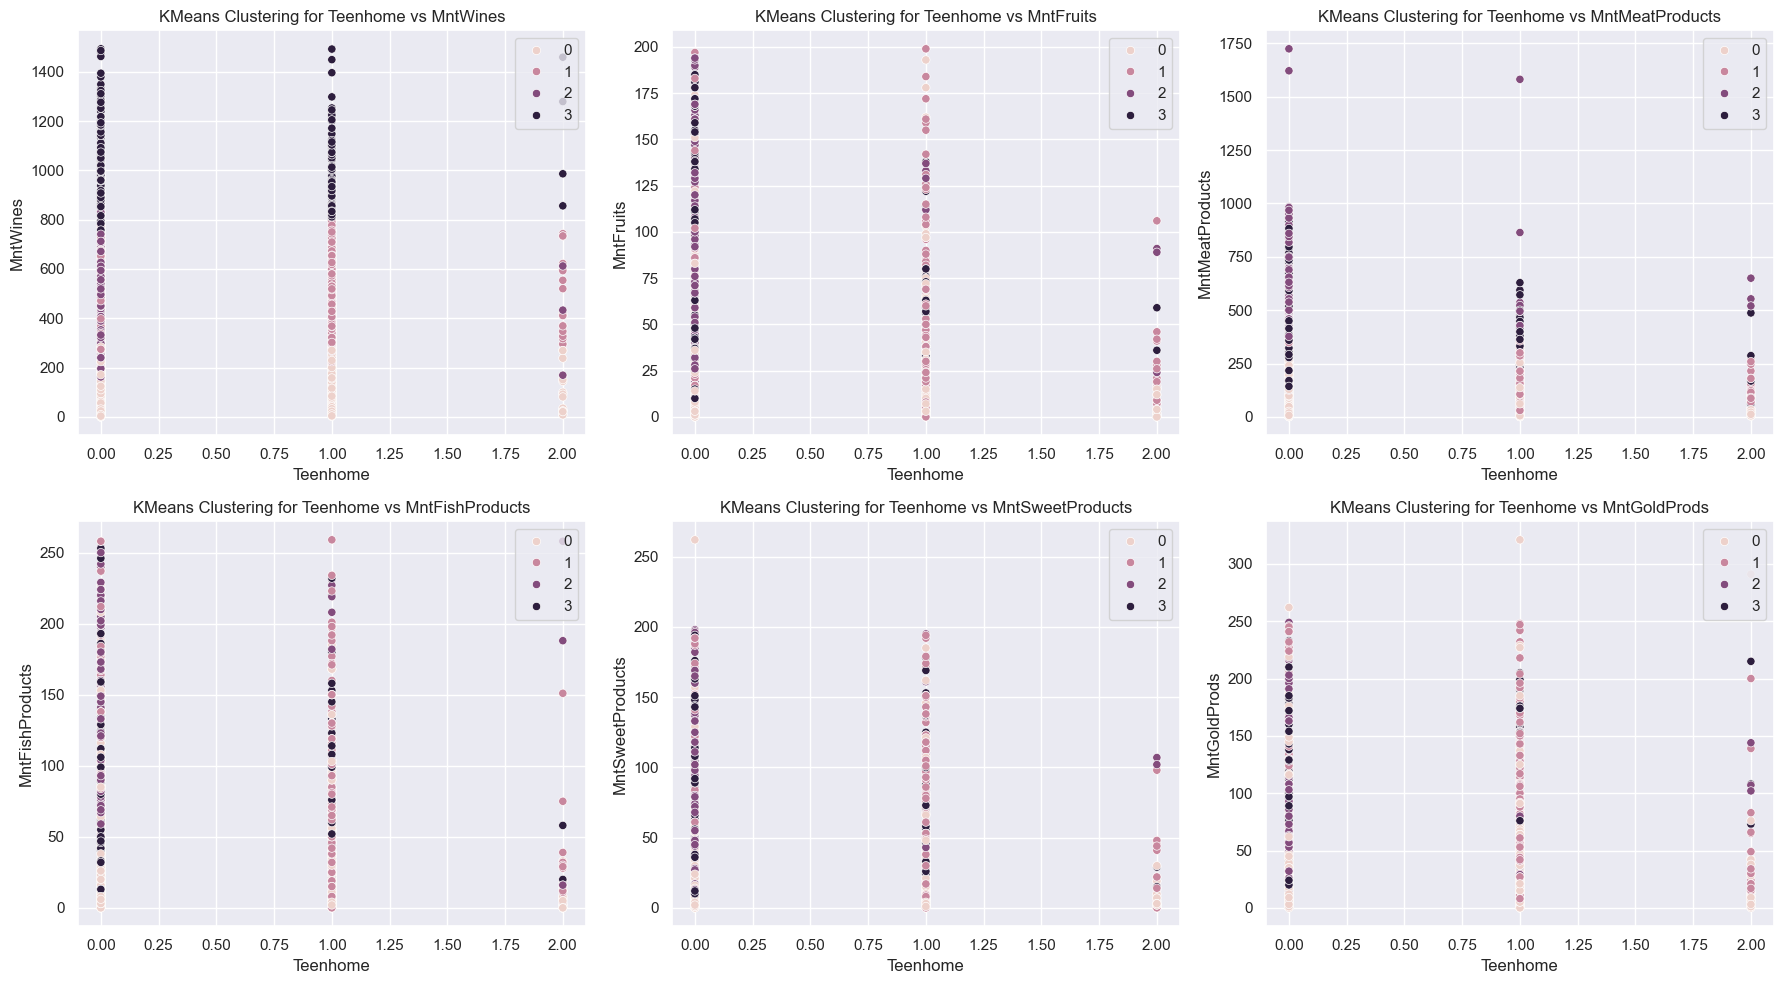

In [85]:

n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

response_variables = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Loop through each predictor variable
for predictor_variable in ['MaritalStatusEncoded', 'Kidhome', 'Teenhome']:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    # Fit KMeans on the predictor variable and response variables
    kmeans.fit(customerdf_numeric[[predictor_variable] + response_variables])
    
    # Loop through each response variable
    for i, response_variable in enumerate(response_variables):
        sb.scatterplot(data=customerdf_numeric, x=predictor_variable, y=response_variable, hue=kmeans.labels_, ax=axes[i])
        axes[i].set_title(f'KMeans Clustering for {predictor_variable} vs {response_variable}')
        axes[i].set_xlabel(predictor_variable)
        axes[i].set_ylabel(response_variable)

    plt.tight_layout()
    plt.show()
